# Homework 2 - Logistic Regression
In Andrew Ng's course, we learned about logistic regression, a classification learning algorithm that will be used to solve the problem description.

Problem description: In a dataset called "ex2data1.txt", there are two tests grades of a student and their acceptance into the college in a training example.

Example:   85.38384, 28.3884, 0

Build a classification model that estimates an applicant's probability of admission based on the scores of the two provided exams.

## Preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

In [4]:
dataset = pd.read_csv("ex2data1.txt", header=None)
dataset.columns = ["Test Score 1", "Test Score 2", "Admittance"]
dataset.head()

,Test Score 1,Test Score 2,Admittance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
dataset.describe()

,Test Score 1,Test Score 2,Admittance
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
X_matrix_original = dataset.iloc[:, [0, 1]].values
Y_matrix_original = dataset.iloc[:, [-1]].values

# For visualization, look at just the first 10.
for i in range(10):
    print("[ {} {} ] [ {} ]".format(X_matrix_original[i][0], \
                                    X_matrix_original[i][1], \
                                    Y_matrix_original[i][0]))

[ 34.62365962451697 78.0246928153624 ] [ 0 ]
[ 30.28671076822607 43.894997524001006 ] [ 0 ]
[ 35.84740876993872 72.90219802708364 ] [ 0 ]
[ 60.18259938620975 86.30855209546827 ] [ 1 ]
[ 79.0327360507101 75.3443764369103 ] [ 1 ]
[ 45.083277476683385 56.316371781530506 ] [ 0 ]
[ 61.10666453684766 96.51142588489624 ] [ 1 ]
[ 75.02474556738889 46.55401354116538 ] [ 1 ]
[ 76.09878670226256 87.42056971926803 ] [ 1 ]
[ 84.43281996120034 43.533393310721095 ] [ 1 ]


## Visualization

In [7]:
# Select all rows with admittance (1)
admitted_matrix = np.array([[1.0, 1.0, 1.0]])
for row in dataset.values:
    if row[2] == 1.0:
        admitted_matrix = np.append(admitted_matrix, np.expand_dims(row, axis=0), \
                                    axis=0)
admitted_matrix = admitted_matrix[1:, :]

# Select all rows with non-admittnce (0)
non_admitted_matrix = np.array([[1.0, 1.0, 1.0]])
for row in dataset.values:
    if row[2] == 0.0:
        non_admitted_matrix = np.append(non_admitted_matrix, \
                                          np.expand_dims(row, axis=0), \
                                          axis=0)
non_admitted_matrix = non_admitted_matrix[1:, :]

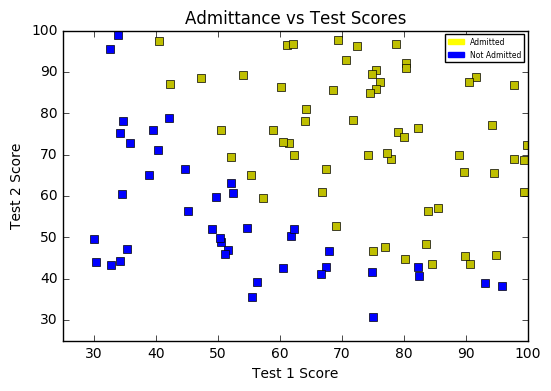

In [8]:
plt.plot(admitted_matrix[:, 0], admitted_matrix[:, 1], "ys", \
            non_admitted_matrix[:, 0], non_admitted_matrix[:, 1], "bs")
GRAPH_EXPAND_VAL = 5
plt.xlim(int(dataset.values[:, 0].min() - GRAPH_EXPAND_VAL), 100)
plt.ylim(int(dataset.values[:, 1].min() - GRAPH_EXPAND_VAL), 100)
plt.title("Admittance vs Test Scores")
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")

admitted_patch = mpatches.Patch(color="yellow", label="Admitted")
non_admitted_patch = mpatches.Patch(color="blue", label="Not Admitted")

plt.legend(handles=[admitted_patch, non_admitted_patch], prop={"size": 5.5})

plt.show()

## Sigmoid Function

The sigmoid function serves the purpose of reducing the value of our hypothesis in between 0 and 1. Prior to logistic regression, it was proposed that we could attempt to fit a linear regressor through a binary classification problem set. We found that one of the problems with this approach was that the regressor often exceeded or dropped below the 2 values of the binary classification system -- the sigmoid function solves this problem by transforing our function.

<center><h2>$g(z) = \frac{1}{1 + e^{-z}}$</h2></center>

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Cost Function for Logistic Regression

It is evident that the cost function for logistic regression judges the hypothesis function based off of its promiximity to the actual 1 or 0 value it should predict. For that reason, we use log and constrain its view from 0 to 1 to judge the prediction

<center><h2>$ J(Θ) = -\frac{1}{m} [ \sum y \log(h(x)) + (1-y)\log(1-h(x)) ]$</h2></center>

In [10]:
X_final = np.append(np.ones((X_matrix_original[:, [0]].size, 1)), X_matrix_original, axis=1)
Y_final = Y_matrix_original.copy().ravel()

In [11]:
# OLD
def cost_function_OLD(parameters, X, Y):
    examples_count = Y.size
    inner_result = 0
    
    for i in range(examples_count):
        inner_result = inner_result + (Y[i] * math.log(sigmoid(np.dot(X[i, :], parameters))) \
                        + (1 - Y[i]) * math.log(1 - sigmoid(np.dot(X[i, :], parameters))))
    cost = (-1 / examples_count) * inner_result
    return cost

In [12]:
def cost_function(parameters, X, Y):
    examples_count = Y.size
    
    result = (Y * np.log(sigmoid(np.dot(X, parameters))) \
                        + (1 - Y) * np.log(1 - sigmoid(np.dot(X, parameters)))).sum()
    cost = (-1 / examples_count) * result
    return cost

In [13]:
cost_trial_1 = cost_function(np.array([0.0, 0.0, 0.0]), X_final, Y_final)
print("With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of {} is calculated.".format(cost_trial_1))

With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of 0.6931471805599453 is calculated.


In [14]:
cost_trial_1 = cost_function_OLD(np.array([0.0, 0.0, 0.0]), X_final, Y_final)
print("With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of {} is calculated.".format(cost_trial_1))

With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of 0.693147180559946 is calculated.


In [15]:
# This changed massively after feature scaling
cost_trial_2 = cost_function(np.array([-24, 0.2, 0.2]), X_final, Y_final)
print("With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of {} is calculated.".format(cost_trial_2))

With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of 0.21833019382659796 is calculated.


In [16]:
cost_trial_2 = cost_function_OLD(np.array([-24, 0.2, 0.2]), X_final, Y_final)
print("With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of {} is calculated.".format(cost_trial_2))

With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of 0.21833019382659788 is calculated.


# Gradient Descent for Logistic Regression

Because the new cost function allows for a convex curve on the J(θ) vs θ curve, we can still use a learning algorithm like gradient descent to optimize θ.

![Image](http://2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s1600/gradient+descent+algorithm+OLS.png)

In [17]:
def gradient_descent(X, Y, init_parameters, alpha, iters):
    examples_count = X[:, 0].size # 100
    update_parameters = init_parameters.copy() # [ 0 0 0 ]
    cost_vector = np.zeros(iters) 
    
    for i in range(iters):
        raw_difference = sigmoid(np.dot(X, update_parameters.T)) - Y # proposed vetorized implem
        for j in range(len(update_parameters)):
            inner_term = np.multiply(raw_difference, X[:, j]).sum()
            init_parameters[j] = update_parameters[j] - (alpha * (1 / examples_count)) * inner_term
        
        # Note, parameter changes don't have to be simultaneous with my implementation, here.
        update_parameters = init_parameters.copy()
        cost_vector[i] = cost_function(update_parameters, X, Y)
    
    return cost_vector, update_parameters

#### Note: The parameter values chosen below were found after running {0-9},000,000 iterations of gradient descent!
##### ** Edit: partially due to no feature scaling **
Due to this, in the section after discussing the decision boundary, we'll look at an advanced optimization method that will allow us to more quickly reach our ideal parameter values.

Note: It can also be noted that a normal equation method could have been used to find these parameters.

In [18]:
cost_vector, parameters = gradient_descent(X_final, Y_final, np.array([-24.01828676,   0.19709041,   0.19222144]), .0028, 1)

In [19]:
cost_vector

array([ 0.20369987])

In [20]:
parameters

array([-24.01828777,   0.19709042,   0.19222145])

## Finding the Decision Boundary
So, we've implemented gradient descent and the cost function, and we're getting ready to draw the decision boundary. So, how do we draw it? Recall that the decision boundary is drawn where "z" is equal to 0. The "z" value is the value sent into the sigmoid function.

<center><h2>$g(z) = \frac{1}{1 + e^{-z}}$</h2></center>

It is crucial to recall that the value of z is the dot product of the transpose of Θ and X. In mathematical terms:

<center>$z = Θ^{T} X$</center>

Now, we can solve for Z = Θ.T X = 0 to find our decision boundary!

In [21]:
#array([-24.01828777,   0.19709042,   0.19222145])
coeff1 = 0.19709042 / -0.19222145
coeff2 = -24.01828777 / -0.19222145

In [22]:
X_final[:, [0, 1]]

row1 = np.array(coeff1 * X_final[:, [1]])
row2 = np.array(coeff2 * X_final[:, [0]])

predicted_x2_points = row1 + row2

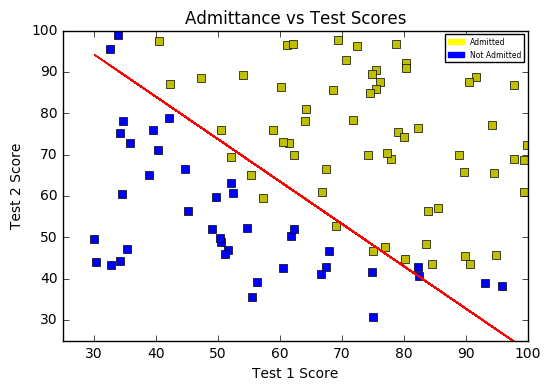

In [23]:
plt.plot(admitted_matrix[:, 0], admitted_matrix[:, 1], "ys", \
            non_admitted_matrix[:, 0], non_admitted_matrix[:, 1], "bs")
plt.plot(X_final[:, [0, 1]], predicted_x2_points, color="red")
GRAPH_EXPAND_VAL = 5
plt.xlim(int(dataset.values[:, 0].min() - GRAPH_EXPAND_VAL), 100)
plt.ylim(int(dataset.values[:, 1].min() - GRAPH_EXPAND_VAL), 100)
plt.title("Admittance vs Test Scores")
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")

admitted_patch = mpatches.Patch(color="yellow", label="Admitted")
non_admitted_patch = mpatches.Patch(color="blue", label="Not Admitted")

plt.legend(handles=[admitted_patch, non_admitted_patch], prop={"size": 5.5})

plt.show()

## Advanced Optimization Methods
Now, let's take a look at using an advanced optimization method to find our parameters more quickly. Gradient Descent took about 5,000,000+ iterations to reach a satisfying decision boundary. It is clear, then, that using SciPy's optimize module could be of use to us. In specific, we'll look at the usage of fmin_tnc, a *conjugate gradient* method of optimization.

Before we run optimize's fmin_tnc function, we need to modify the cost function and gradient descent just a little bit. Here's a few things we have to do for scipy.optimize.fmin_tnc to work:

1. Leave the iterations and alpha to fmin_tnc -- remove those parameters.
2. Create 'func', a cost function that is vectorized.
3. Create 'fprime', the derivative of the cost function (per parameter) --> minified gradient descent

**Note:** the only reason the cost_function() defined above will not function with fmin_tnc() is simply because of the fact that the x0 keyword argument will always default the parameters to a vector. The above defined cost_function() does not take this into account, creating mathematical errors in the linear algebra, but still returning a cost.

In [353]:
def advanced_cost_function(parameters, X, Y): # func
    parameters = np.expand_dims(parameters, axis=0)
    
    inner_value = - (np.multiply(Y, np.log(sigmoid(np.dot(X, parameters.T)))) + \
                        np.multiply((1 - Y), np.log(1 - sigmoid(np.dot(X, parameters.T)))))
    total_cost = inner_value.sum() / len(X) # a float
    return total_cost

In [354]:
def derivative_cost_function(parameters, X, Y): # fprime
    parameters = np.expand_dims(parameters, axis=0) # default is 1D, so we must expand_dims
    result_parameters = np.zeros((parameters.shape[1], 1))
    raw_difference = sigmoid(np.dot(X, parameters.T)) - Y
    
    for i in range(len(parameters.ravel())):
        result_parameters[i] = np.multiply(raw_difference, X[:, [i]]).sum() / len(X)
    
    return result_parameters

In [355]:
from scipy import optimize

In [356]:
advanced_parameters_results = optimize.fmin_tnc(func=advanced_cost_function, x0=np.array([[0.0, 0.0, 0.0]]), fprime=derivative_cost_function, args=(X_final, np.expand_dims(Y_final, axis=1)))

**What does fmin_tnc return?** scipy.optimize.fmin_tnc() returns a vector of the predicted parameters, iteration count, and a status code!

In [364]:
advanced_parameters_results

(array([-25.16131866,   0.20623159,   0.20147149]), 36, 0)

In [370]:
param0 = advanced_parameters_results[0][0]
param1 = advanced_parameters_results[0][1]
param2 = advanced_parameters_results[0][2]

In [365]:
cost_function(advanced_parameters_results[0], X_final, Y_final)

0.20349770158947444

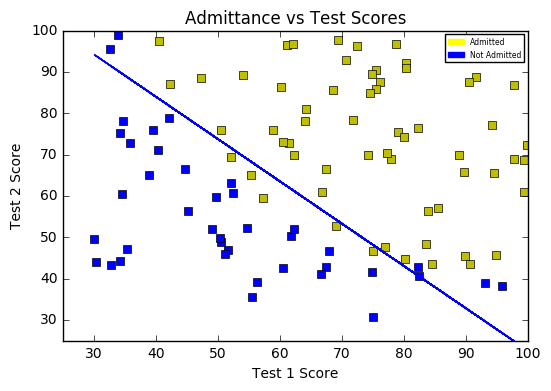

In [366]:
plt.plot(admitted_matrix[:, 0], admitted_matrix[:, 1], "ys", \
            non_admitted_matrix[:, 0], non_admitted_matrix[:, 1], "bs")
plt.plot(X_final[:, 1], ((0.20623159 / -0.20147149) * X_final[:, 1]) + (25.16131866 / 0.20147149)) 
GRAPH_EXPAND_VAL = 5
plt.xlim(int(dataset.values[:, 0].min() - GRAPH_EXPAND_VAL), 100)
plt.ylim(int(dataset.values[:, 1].min() - GRAPH_EXPAND_VAL), 100)
plt.title("Admittance vs Test Scores")
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")

admitted_patch = mpatches.Patch(color="yellow", label="Admitted")
non_admitted_patch = mpatches.Patch(color="blue", label="Not Admitted")

plt.legend(handles=[admitted_patch, non_admitted_patch], prop={"size": 5.5})

plt.show()

## Making a Prediction

Now that we have our parameters, we can make a full prediction using a hypothesis function. *Recall*, that above we defined param0, param1, and param2 for our parameter values.

In [386]:
def predict(test_score_1, test_score_2):
    parameters = np.array([param0, param1, param2])
    new_example = np.array([[1, test_score_1, test_score_2]])
    
    prediction = sigmoid(np.dot(new_example, parameters.T))[0]
    return prediction

In [388]:
predict(70, 55)

0.58802924337624463

In [390]:
print("For a student with scores 45 and 85, we predict an admission probability of {} +- 0.002".format(predict(45, 85)))

For a student with scores 45 and 85, we predict an admission probability of 0.7762906244027636 +- 0.002


### Using a boundary to make a final decision

$h(x) > 0.5 ? 1 (Admitted) : 0 (Not Admitted)$

In [395]:
def decision(test_score_1, test_score_2):
    return (1, "admitted") if predict(test_score_1, test_score_2) >= 0.5 else (0, "not admitted")

In [396]:
decision(45, 85)

(1, 'admitted')

## Measuring Accuracy

Let's wrap up non-regularized logistic regression by seeing how many of the predictions against the training set we would jave gotten correct!

In [428]:
correct = 0
for row in dataset.values[:,[0, 1, 2]]:
    if decision(row[0], row[1])[0] == int(row[2]):
        correct += 1
print("Expected accuracy (approx): {}".format(correct / len(dataset)))

Expected accuracy (approx): 0.89
